In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cross_validation import train_test_split
import warnings 
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

In [21]:
# shape of the table
df.shape

(1599, 12)

In [32]:
# data type info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:title={'center':'Quality vs alcohol'}, xlabel='quality', ylabel='alcohol'>

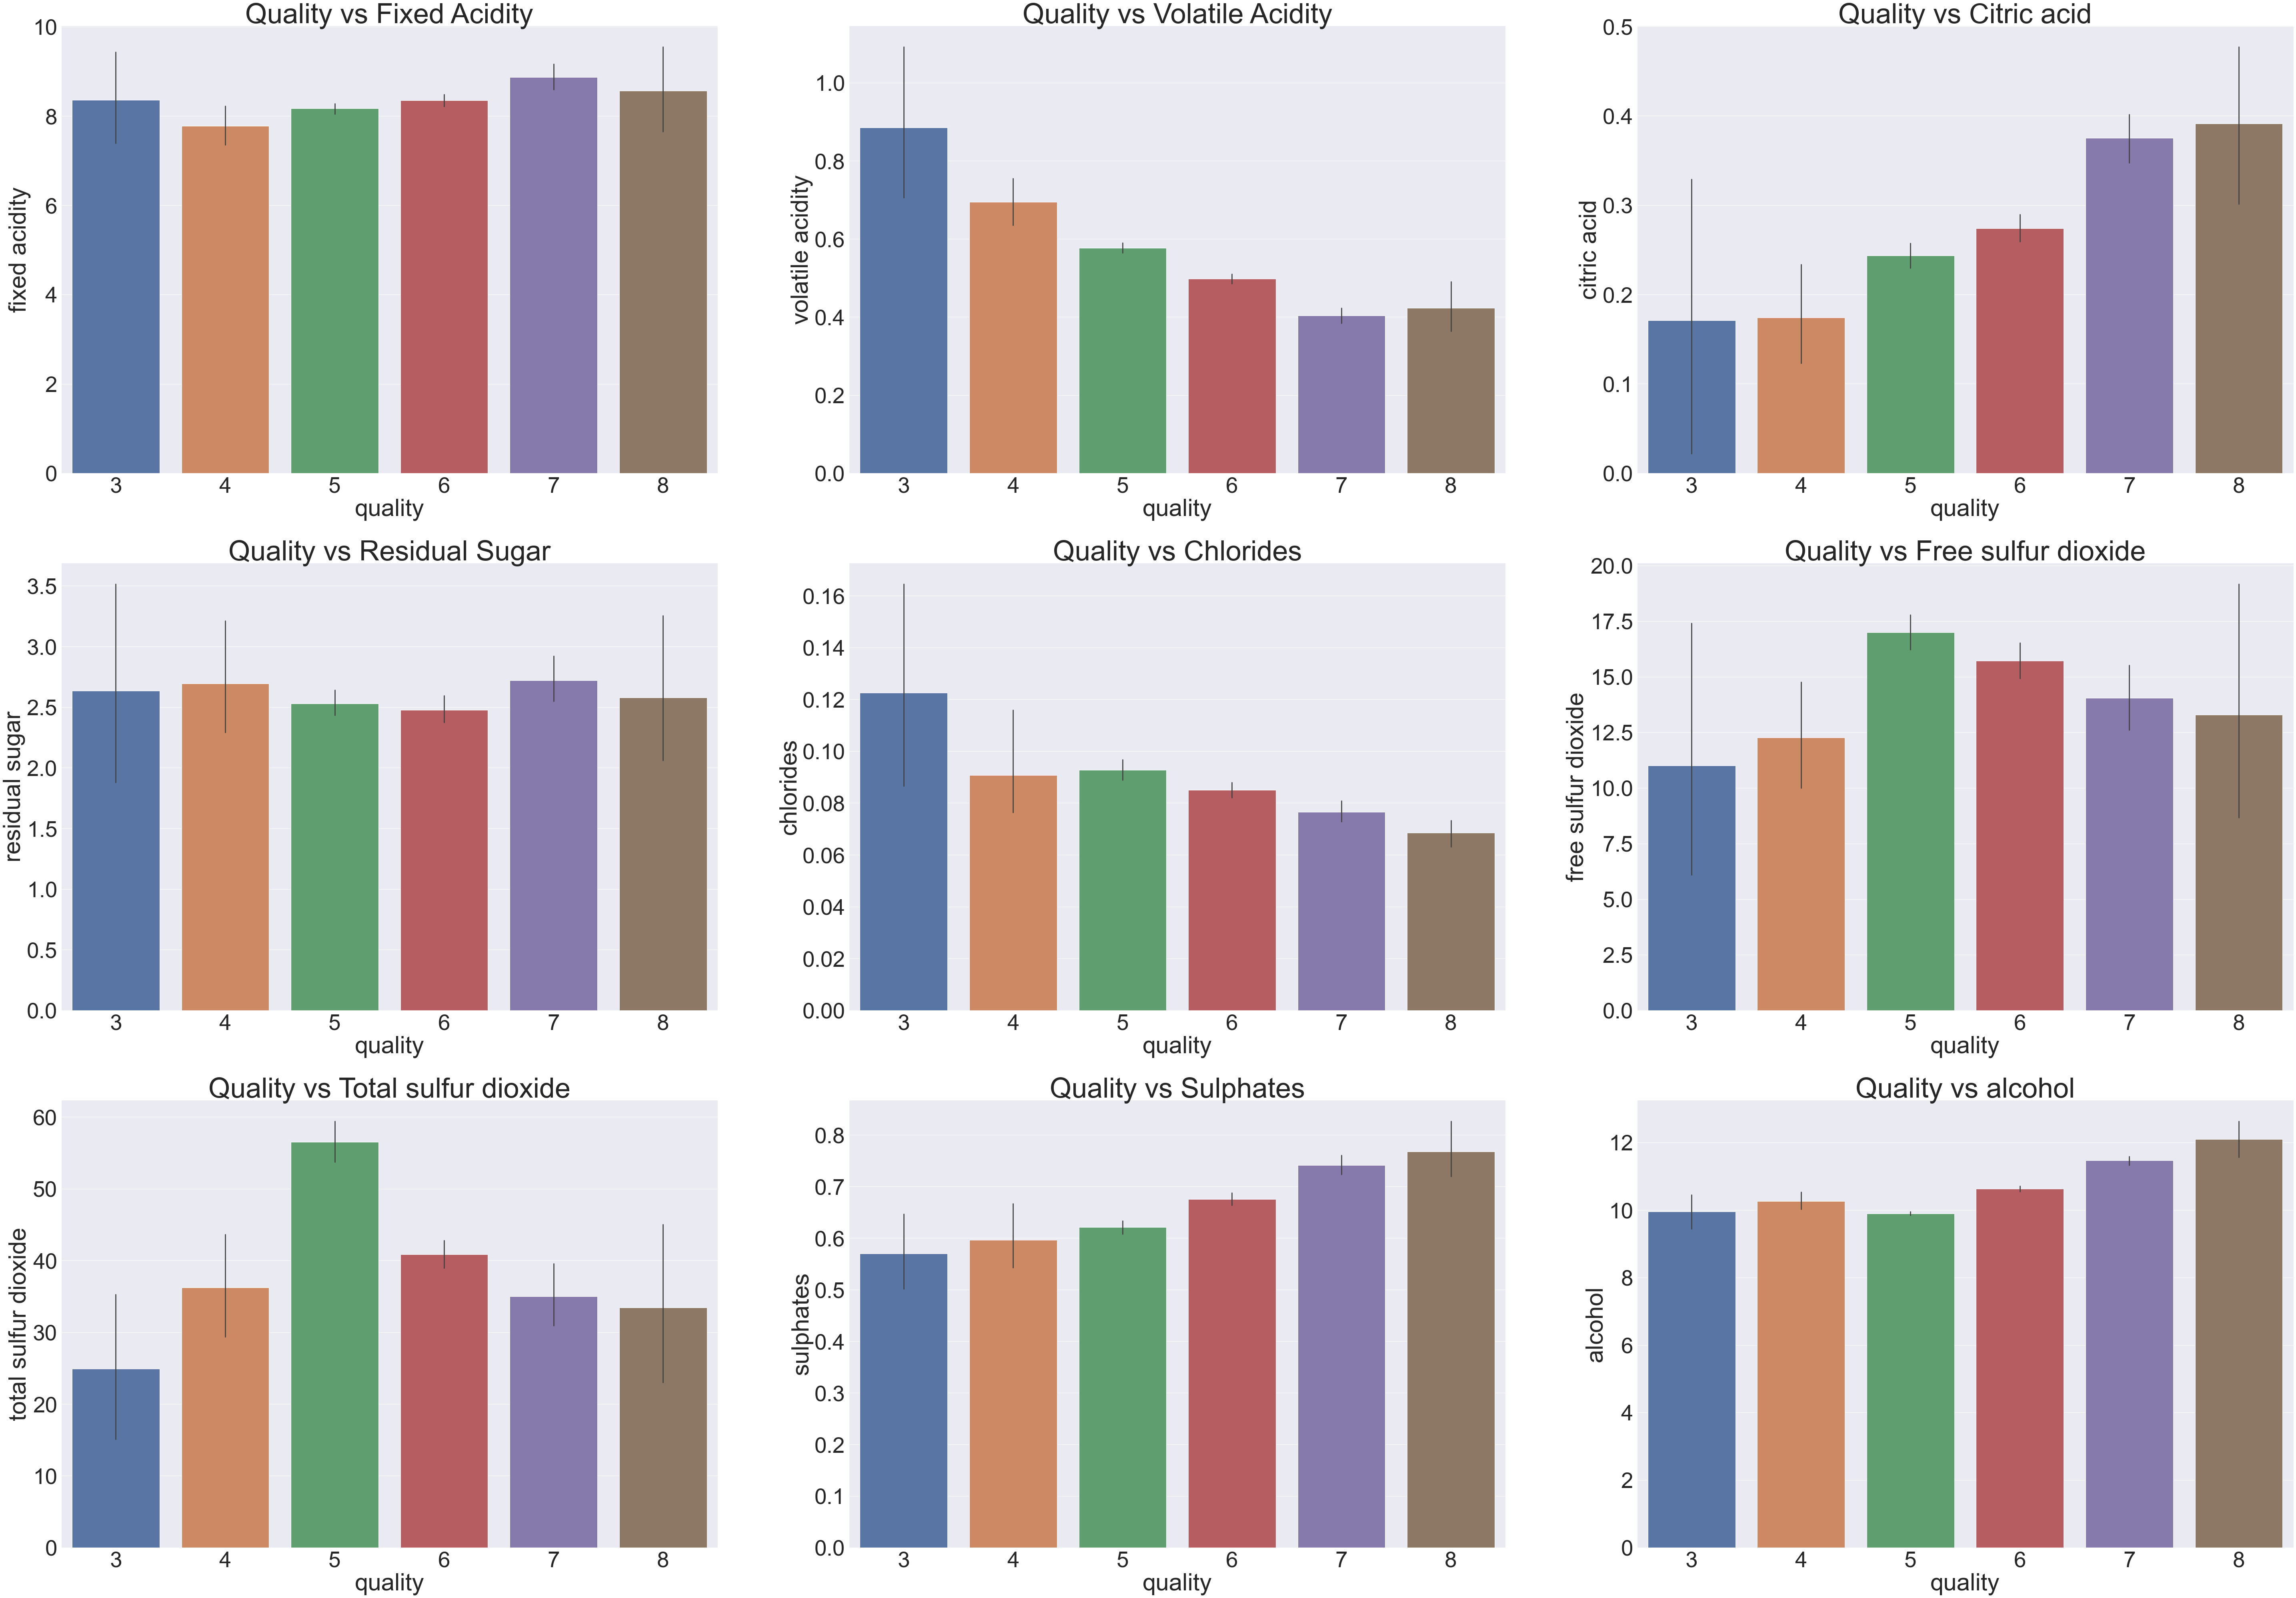

In [102]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=70)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs Residual Sugar",fontsize=70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs Free sulfur dioxide",fontsize=70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

plt.subplot(337)
plt.title("Quality vs Total sulfur dioxide",fontsize=70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=70)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=70)
sns.barplot(x = 'quality', y = 'alcohol', data = df)



In [114]:
bins = (2,6.5,8)
classes = ['bad','good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = classes)

In [115]:
label_quality = LabelEncoder()

In [119]:
df['quality'] = label_quality.fit_transform(df['quality']) 

In [120]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

So 0 indicates bad and 1 indicates good


<AxesSubplot:title={'center':'Quality vs count'}, xlabel='quality', ylabel='count'>

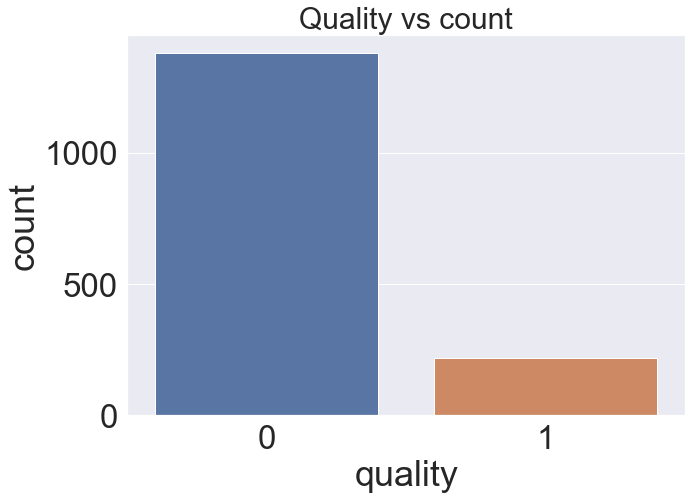

In [122]:
plt.figure(figsize=(10,7))
sns.set(font_scale=3)
plt.title("Quality vs count",fontsize=30)
sns.countplot(df['quality'])

In [123]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


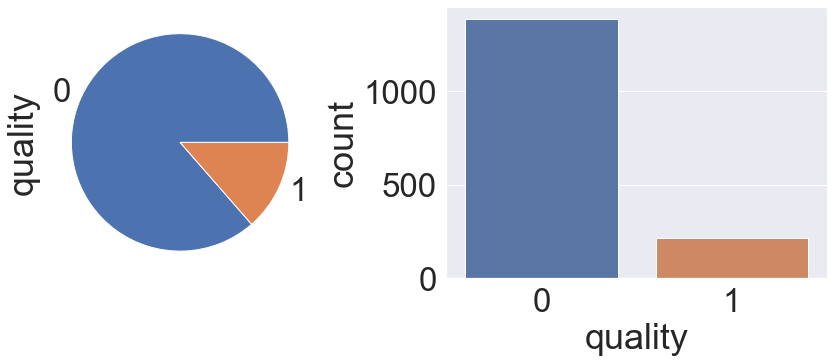

In [146]:
print(df['quality'].value_counts())
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
ax = ax.flatten()
df['quality'].value_counts().plot(x=0, y=1, kind='pie', figsize=(15,5), ax=ax[0])
sns.countplot(df['quality'], ax=ax[1])
plt.show()
